In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [22]:
u = np.array([[1], [1]])
v = np.array([[2], [1]])

v_hat = v / np.linalg.norm(v)

d = u.T.dot(v_hat)
print(f"distance (D): {d}")

intersection = d * v_hat
print(f"intersection: {intersection}")

distance (D): [[1.34164079]]
intersection: [[1.2]
 [0.6]]


# Question 2

In [23]:
X_0 = np.array([
    [-2, 1],
    [0, 3],
    [1, 4],
    [1, 5],
    [2, 5]
])

X_1 = np.array([
    [0, 0],
    [1, 1],
    [2, 1],
    [3, 2],
    [4, 3]
])

In [24]:
# Get centering matrix C
X = np.vstack((X_0, X_1))

c0 = np.reshape(np.mean(X_0, axis=0), (2, 1))
c1 = np.reshape(np.mean(X_1, axis=0), (2, 1))

C = np.eye(5) - (1/5) * np.ones((5, 5))

R1 = c0 - c1
S2 = X_0.T.dot(C).dot(X_0) + X_1.T.dot(C).dot(X_1)
v_lda = np.linalg.inv(S2).dot(R1)

v_lda_hat = v_lda / np.linalg.norm(v_lda)
X_0p = (X_0 - np.mean(X, axis=0)).dot(v_lda_hat).dot(v_lda_hat.T)
X_1p = (X_1 - np.mean(X, axis=0)).dot(v_lda_hat).dot(v_lda_hat.T)

px = np.arange(-4, 4, 0.1)
py = px * v_lda_hat[1] / v_lda[0]

In [25]:
C = np.eye(10) - (1/10)*np.ones((10,10))
C_X = C.dot(X)

[D, V] = np.linalg.eigh(X.T.dot(C).dot(X))
v_pca = np.reshape(V[:, 1], (2, 1))

v_pca_hat = v_pca / np.linalg.norm(v_pca)
X_0p2 = (X_0 - np.mean(X_0, axis=0)).dot(v_pca_hat).dot(v_pca_hat.T)
X_1p2 = (X_1 - np.mean(X_1, axis=0)).dot(v_pca_hat).dot(v_pca_hat.T)

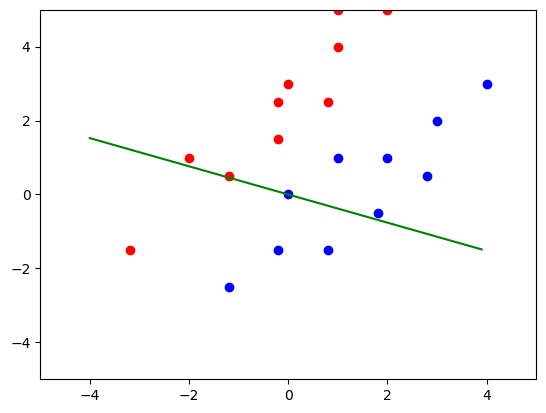

In [28]:
q = [-5, 5]
plt.scatter(X_0[:, 0], X_0[:, 1], color="red")
plt.scatter(X_1[:, 0], X_1[:, 1], color="blue", label="Original data (not centered)")

plt.scatter(C_X[0:5, 0], C_X[0:5, 1], color="red")
plt.scatter(C_X[5:10, 0], C_X[5:10, 1], color="blue")
plt.plot(px, py, label="LDA line", color="green")

plt.xlim(q)
plt.ylim(q)

plt.show()